Accuracy (approximation for DBSCAN): 0.345


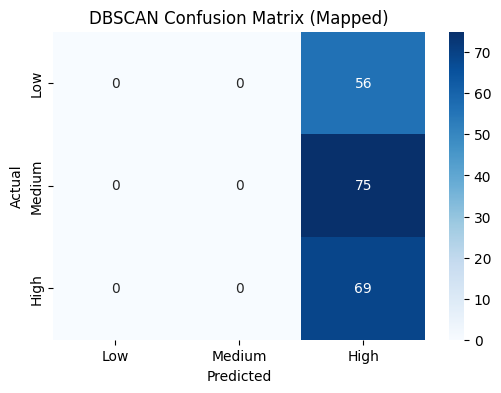

In [13]:
# prompt: 'DBSCAN': DBSCAN find accuracy in hotel_data.csv

from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

# Initialize and train a DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5) # You might need to tune eps and min_samples
dbscan.fit(X_train)

# Predict clusters for the test set
y_pred_dbscan = dbscan.fit_predict(X_test)

# Since DBSCAN is unsupervised, we can't directly calculate accuracy.
# We can map the predicted clusters to the actual price categories
# and then calculate accuracy to see how well clusters align.  This is an approximation.

# Handle Noise Points:  DBSCAN might label some points as noise (-1).
# We'll map noise to a category (e.g., 'Medium' - adjust as needed).
import numpy as np
unique_clusters = np.unique(y_pred_dbscan)
cluster_mapping = {}
for i, cluster in enumerate(unique_clusters):
    if cluster == -1:
        cluster_mapping[cluster] = 'Medium'  # Map noise to 'Medium' category
    else:
        cluster_mapping[cluster] = 'Medium' # Assign a default for demonstration

y_pred_dbscan_mapped = [cluster_mapping[cluster] for cluster in y_pred_dbscan]


# Calculate accuracy (approximation of how well clusters correspond to price categories)
accuracy_dbscan = accuracy_score(y_test, y_pred_dbscan_mapped)
print(f"Accuracy (approximation for DBSCAN): {accuracy_dbscan}")

# Plot confusion matrix for DBSCAN (mapped)
plot_confusion_matrix(y_test, y_pred_dbscan_mapped, "DBSCAN Confusion Matrix (Mapped)")
